![SegmentLocal](Images_StudIP/Logo2.png)

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 1. Loading and preprocessing behavioral data

In [2]:
# Create path to the folder "behavioral"
filepath = os.getcwd()+ "/behavioral"

# Create a list of path names that end with .csv
all_files = glob.glob(os.path.join(filepath, "*.csv")) 

# Concatenate all files to obtain a single dataframe
df_from_each_file = (pd.read_csv(f) for f in all_files) 
df = pd.concat(df_from_each_file, ignore_index=True)

In [3]:
# Take a look at the columns of the dataframe
df.columns

Index(['target_ori', 'target_spatial', 'ori_correct_pos',
       'spatial_correct_pos', 'player1_answer', 'player2_answer',
       'time_player1', 'time_player2', 'player1_correct', 'player2_correct',
       'player1_reward', 'player2_reward', 'trial', 'condition', 'block',
       'pe_player1', 'pe_player2', 'change_ori', 'change_spatial', 'group',
       'pl1_feature', 'pl2_feature'],
      dtype='object')

In [4]:
# Take a look at the head of the dataframe
df.head()

,target_ori,target_spatial,ori_correct_pos,spatial_correct_pos,player1_answer,player2_answer,time_player1,time_player2,player1_correct,player2_correct,...,trial,condition,block,pe_player1,pe_player2,change_ori,change_spatial,group,pl1_feature,pl2_feature
0,35,12,0,0,2,0,1.032753,0.841239,0,1,...,1,comp,1,0,0,15,3.2,403,player_ori,player_spatial
1,101,12,0,1,0,1,1.276442,0.964638,1,1,...,2,comp,1,1,0,15,3.2,403,player_ori,player_spatial
2,116,12,1,1,0,3,1.590759,1.335114,0,0,...,3,comp,1,2,2,15,3.2,403,player_ori,player_spatial
3,108,18,2,2,0,2,1.556629,1.292850,0,1,...,4,comp,1,2,2,15,3.2,403,player_ori,player_spatial
4,153,17,2,1,3,3,1.617046,1.153347,0,0,...,5,comp,1,1,0,15,3.2,403,player_ori,player_spatial


In [5]:
# Take a look at the tail of the dataframe
df.tail()

,target_ori,target_spatial,ori_correct_pos,spatial_correct_pos,player1_answer,player2_answer,time_player1,time_player2,player1_correct,player2_correct,...,trial,condition,block,pe_player1,pe_player2,change_ori,change_spatial,group,pl1_feature,pl2_feature
15995,21,11,0,2,0,0,1.096166,1.431768,0,1,...,636,coop,16,1,1,17,2.5,439,player_spatial,player_ori
15996,24,10,1,1,1,0,1.428242,1.411774,1,0,...,637,coop,16,2,2,17,2.5,439,player_spatial,player_ori
15997,110,14,1,2,2,1,1.648092,1.055734,1,1,...,638,coop,16,2,2,17,2.5,439,player_spatial,player_ori
15998,109,18,1,0,1,3,1.642279,1.290422,0,0,...,639,coop,16,0,0,17,2.5,439,player_spatial,player_ori
15999,121,20,0,3,3,0,1.553030,1.313124,1,1,...,640,coop,16,1,1,17,2.5,439,player_spatial,player_ori


### Preprocessing behavioral data

In [6]:
# Column filters for different feature combinations
filter_pl1_ori = ['target_ori', 'ori_correct_pos', 'player1_answer', 'time_player1', 
                  'player1_correct', 'player1_reward', 'trial', 'condition', 'block', 
                  'change_ori', 'group', 'pl1_feature']
filter_pl2_ori = ['target_ori', 'ori_correct_pos', 'player2_answer', 'time_player2', 
                  'player2_correct', 'player2_reward', 'trial', 'condition', 'block', 
                  'change_ori', 'group', 'pl2_feature']
filter_pl1_spatial = ['target_spatial', 'spatial_correct_pos', 'player1_answer', 
                      'time_player1', 'player1_correct', 'player1_reward', 'trial', 
                      'condition', 'block', 'change_spatial', 'group', 'pl1_feature']
filter_pl2_spatial = ['target_spatial', 'spatial_correct_pos', 'player2_answer', 
                      'time_player2', 'player2_correct', 'player2_reward', 'trial', 
                      'condition', 'block', 'change_spatial', 'group', 'pl2_feature']

# Column labels
standard_labels = ['target', 'position', 'answer_position', 'time', 'answer', 'feedback', 
                   'trial', 'condition', 'block', 'change', 'group', 'task'] 

In [7]:
# Create a new dataframe and filter the first feature combination pl1_feature: player_ori
pl1_ori = df[df['pl1_feature'] == 'player_ori']

# Subset the dataframe columns according to filter_pl1_ori
pl1_ori = pl1_ori.filter(items = filter_pl1_ori)

# Rename (standardize) the columns
pl1_ori.columns = standard_labels

In [8]:
# TODO: Do the same for the remaining 3 feature combinations
pl2_ori = df[df['pl2_feature'] == 'player_ori'] # ['pl2_feature'] == 'player_ori'인 rows만 남겨
pl2_ori = pl2_ori.filter(items = filter_pl2_ori) # filter_pl2_ori에 해당되는 columns만 남겨
pl2_ori.columns = standard_labels #칼럼 이름 바꿔

pl1_spatial = df[df['pl1_feature'] == 'player_spatial']
pl1_spatial = pl1_spatial.filter(items = filter_pl1_spatial)
pl1_spatial.columns = standard_labels

pl2_spatial = df[df['pl2_feature'] == 'player_spatial']
pl2_spatial = pl2_spatial.filter(items = filter_pl2_spatial)
pl2_spatial.columns = standard_labels 


# Do not forget to select the correct column filters!

# TODO: Concatenate the 4 data subsets
df_filtered = pd.concat([pl1_ori,pl2_ori,pl1_spatial,pl2_spatial], ignore_index = True)
df_filtered.head

<bound method NDFrame.head of        target  position  answer_position      time  answer  feedback  trial  \
0          35         0                2  1.032753       0     -0.05      1   
1         101         0                0  1.276442       1      0.00      2   
2         116         1                0  1.590759       0      0.00      3   
3         108         2                0  1.556629       0     -0.05      4   
4         153         2                3  1.617046       0      0.00      5   
...       ...       ...              ...       ...     ...       ...    ...   
31995      11         2                2  1.119937       1      0.00    636   
31996      19         1                1  0.974198       1      0.05    637   
31997      14         1                1  1.175050       1      0.00    638   
31998      18         2                2  1.186144       1      0.05    639   
31999      20         0                1  1.107727       0     -0.05    640   

      condition  bloc

In [9]:
# TODO: Get the number of trials for one group
count_trials = df[df['group'] == 403].shape[0]

# TODO: Get the number of subjects
count_subjects = len(all_files) * 2

# TODO: Add a column 'subject_ID' with unique IDs for each subject
ids = [i for i in range(count_subjects) for x in range(count_trials)]
df_filtered.insert(loc = 0, column = 'subject_ID', value = ids)

In [10]:
# TODO: Remove all trials with response faster than 50 ms
df_cleaned = df_filtered[df_filtered.time > 0.05]

# TODO: How many trials have been removed?
len(df_filtered) - len(df_cleaned)

2

### Checking data distribution

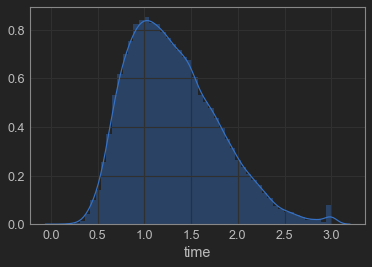

In [11]:
# TODO: Visualize the data distribution of response times
fig, axes = plt.subplots()
sns.distplot(df_cleaned.time)

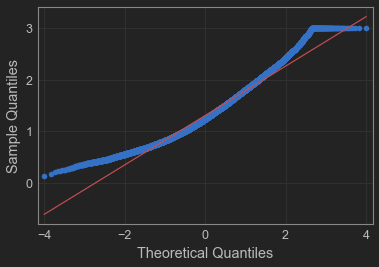

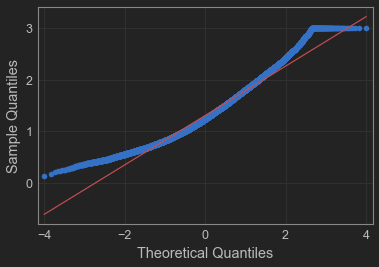

In [12]:
# TODO: Create a QQ-Plot of response times
fig, ax = plt.subplots()
sm.qqplot(df_cleaned.time, line = 'r', ax = ax)

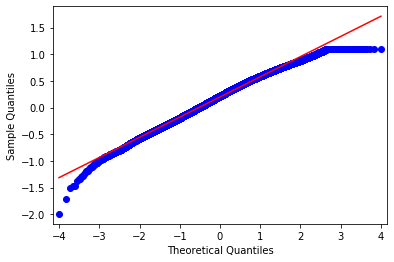

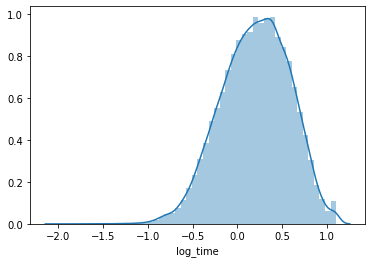

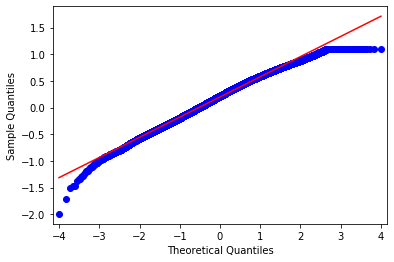

In [14]:
# TODO: Log-transform response times
df_log = df_cleaned.copy()
df_log['log_time'] = np.log(df_log['time'])

# TODO: Create Histogram and QQ-plot for log-transformed response times
fig, axes = plt.subplots()
sns.distplot(df_log.log_time)
sm.qqplot(df_log.log_time, line = 'r')



## 2. Visualizing the data

### Accuracy


In [15]:
df_cleaned.head

<bound method NDFrame.head of        subject_ID  target  position  answer_position      time  answer  \
0               0      35         0                2  1.032753       0   
1               0     101         0                0  1.276442       1   
2               0     116         1                0  1.590759       0   
3               0     108         2                0  1.556629       0   
4               0     153         2                3  1.617046       0   
...           ...     ...       ...              ...       ...     ...   
31995          49      11         2                2  1.119937       1   
31996          49      19         1                1  0.974198       1   
31997          49      14         1                1  1.175050       1   
31998          49      18         2                2  1.186144       1   
31999          49      20         0                1  1.107727       0   

       feedback  trial condition  block  change  group            task  
0       

In [16]:
# TODO: Calculate the mean of answers per subject, task and condition

mean_df = df_cleaned.groupby(['subject_ID','task','condition'], as_index = False)['answer'].mean()


# TODO: Multiply the values of column answer with 100 and rename it as accuracy
mean_df['answer'] = mean_df['answer'].apply(lambda x: x*100)
mean_df.rename(columns = {'answer':'accuracy'}, inplace = True)
print(mean_df)

    subject_ID            task condition  accuracy
0            0      player_ori      comp   60.9375
1            0      player_ori      coop   60.3125
2            1      player_ori      comp   61.8750
3            1      player_ori      coop   64.3750
4            2      player_ori      comp   40.6250
..         ...             ...       ...       ...
95          47  player_spatial      coop   54.0625
96          48  player_spatial      comp   68.4375
97          48  player_spatial      coop   64.3750
98          49  player_spatial      comp   61.5625
99          49  player_spatial      coop   63.4375

[100 rows x 4 columns]


53.38061324451411
10.131428401527586


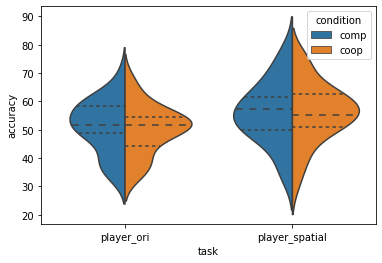

In [189]:
# TODO: Plot the accuracy per task and condition
fig, axes = plt.subplots()
sns.violinplot(data = mean_df, x = 'task', y = 'accuracy', inner = 'quartile', split = True, hue = 'condition')

# TODO: Calculate the mean accuracy and its standard deviation
mean = mean_df['accuracy'].mean()
std = mean_df['accuracy'].std()

print(mean)
print(std)


In [ ]:
# TODO: Calculate the mean of answers per subject and group
df_paired = df_cleaned['answer'].groupby(['subject_ID', 'group'], as_index = False).mean()

# TODO: Multiply the values of column answer with 100 and rename it as accuracy


# TODO: Calculate the difference in accuracy between paired subjects

# TODO: Calculate the mean accuracy and its standard deviation between paired subjects

# You should end up with a mean accuracy of 9% and a standard deviation of 6%

### Response time


In [55]:
print(meanrt_answer)

    subject_ID  answer      time
0            0       0  1.640761
1            0       1  1.569222
2            1       0  1.480455
3            1       1  1.330403
4            2       0  1.160983
..         ...     ...       ...
95          47       1  0.863428
96          48       0  1.060752
97          48       1  0.913936
98          49       0  1.129164
99          49       1  1.021894

[100 rows x 3 columns]


[Text(0, 0, 'competitive'), Text(0, 0, 'cooperative')]

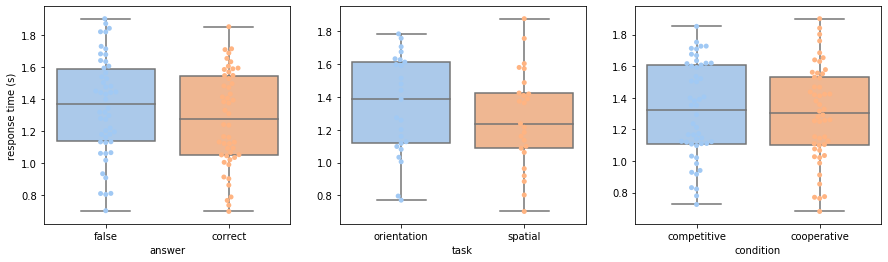

In [66]:
# TODO: Calculate the mean response times per subject per answer
meanrt_answer = df_cleaned.groupby(['subject_ID', 'answer'], as_index = False)['time'].mean()

# TODO: Calculate the mean response times per subject per task
meanrt_task = df_cleaned.groupby(['subject_ID', 'task'], as_index = False)['time'].mean()

# TODO: Calculate the mean response times per subject per condition
meanrt_condition = df_cleaned.groupby(['subject_ID', 'condition'], as_index = False)['time'].mean()

# TODO: Plot the mean response times for each of the 3 grouped datasets

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
sns.set_palette('pastel')

sns.boxplot(x='answer', y='time', data=meanrt_answer, ax=axes[0])
sns.swarmplot(x='answer', y='time', data=meanrt_answer, ax=axes[0])
axes[0].set(ylabel = 'response time (s)')
axes[0].set_xticklabels(['false', 'correct'])

sns.boxplot(data=meanrt_task, x='task', y='time', ax=axes[1])
sns.swarmplot(data= meanrt_task, x = 'task', y = 'time', ax = axes[1])
axes[1].set(ylabel = '')
axes[1].set_xticklabels(['orientation', 'spatial'])

sns.boxplot(data = meanrt_condition, x = 'condition', y = 'time', ax = axes[2])
sns.swarmplot(data = meanrt_condition, x = 'condition', y = 'time', ax = axes[2])
axes[2].set(ylabel = '')
axes[2].set_xticklabels(['competitive', 'cooperative'])

[Text(0, 0, 'false'), Text(0, 0, 'correct')]

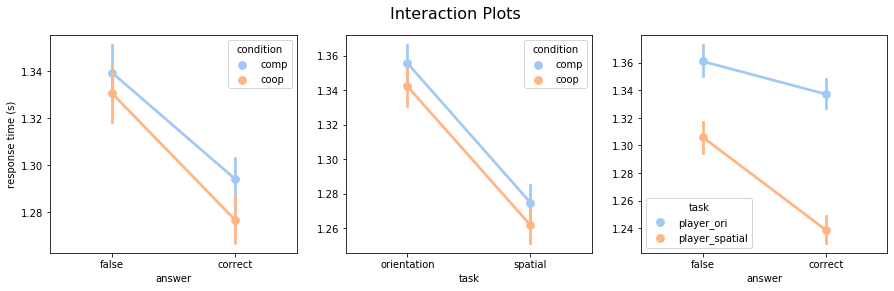

In [84]:
# TODO: Create pointplots for each combination of independent variables 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
fig.suptitle('Interaction Plots', fontsize = 16)
sns.set_palette('pastel')

sns.pointplot(data = df_cleaned, x = 'answer', y = 'time', ax = axes[0], hue = 'condition')
axes[0].set(ylabel = 'response time (s)')
axes[0].set_xticklabels(['false', 'correct'])

sns.pointplot(data = df_cleaned, x = 'task', y = 'time', ax = axes[1], hue = 'condition')
axes[1].set(ylabel = '')
axes[1].set_xticklabels(['orientation', 'spatial'])

sns.pointplot(data = df_cleaned, x = 'answer', y = 'time', ax = axes[2], hue = 'task')
axes[2].set(ylabel = '')
axes[2].set_xticklabels(['false', 'correct'])

# (correctness×task, correctness×condition, task×condition)


## Citations

- Czeszumski A, Ehinger B, Wahn B, and König P (2019) The social situation affects how we process feedback about our actions. Frontiers in Psychology, 10:361. https://doi.org/10.3389/fpsyg.2019.00361